Write comments next to each line of code.  If you aren't sure what a method is or what the parameters are, you can easily look up any of them to describe them correctly.

In [1]:
# !pip install tensorflow
import numpy as np
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt

This function displays an image

In [2]:
def show_image(im):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()

This function displays an image, its label (value), a prediction, and its probability

In [3]:
def show_image_vpp(im,value,prediction,probability):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the value is ",value)
  print("The predicted value is ",prediction," with probability: ",probability)

This function builds a model 

In [4]:
def build_model(input_shape):
    input = keras.Input(shape=(input_shape,),name="data")
    internal = layers.Dense(512,activation="relu")(input)
    output = layers.Dense(10,activation="softmax")(internal)
    model = keras.Model(inputs=input,outputs=output)
    return model

This function trains a model

In [5]:
def train_model(model,train_tensors,train_labels):
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    model.fit(train_tensors,train_labels,epochs=5)

This function predicts the results of a model on some tensors; it returns the predictions and their associated probabilities

In [6]:
def predict(model,test_tensors):
    mpredictions = model.predict(test_tensors)
    digit_predictions = np.array([x.argmax() for x in mpredictions])
    digit_probability = np.array([mpredictions[i][p] for i, p in enumerate(digit_predictions)])
    return digit_predictions,digit_probability

# Get the training and testing data

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Look at the shape of the images

In [8]:
train_shape = train_images.shape
train_shape

(60000, 28, 28)

# Look at the first Image

In [9]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# We need to reshape the tensors

In [10]:
train_tensors = train_images.reshape((train_shape[0],train_shape[1]*train_shape[2]))
train_tensors.shape

(60000, 784)

# Now we can build the model
# We need to give the model the shape of the images

In [11]:
model = build_model(train_tensors.shape[1])

# Now we need to train the model

In [12]:
train_model(model,train_tensors,train_labels)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 3.9074 - accuracy: 0.9084
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8713 - accuracy: 0.9507
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6641 - accuracy: 0.9616
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5974 - accuracy: 0.9687
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5750 - accuracy: 0.9724


# The model is trained; let us see how well it does at recognizing digits
We first need to reshape the testing dataset

In [13]:
test_shape = test_images.shape
test_shape

(10000, 28, 28)

In [14]:
test_tensors = test_images.reshape((test_shape[0],test_shape[1]*test_shape[2])).astype("float32")
test_tensors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Now we can make predictions and get probabilities

In [15]:
pred, prob = predict(model,test_tensors)

313/313 [==============================] - 1s 2ms/step


Display the prediction

In [16]:
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Display the probabilities

In [17]:
prob

array([0.99999994, 0.99999994, 0.99999994, ..., 0.99999994, 0.99999994,
       0.99999994], dtype=float32)

Show image 15 in the test set, its label, its prediction, and its probability

In [ ]:
show_image_vpp(test_images[15],test_labels[15],pred[15],prob[15])

Show image 2 in the test set, its label, its prediction, and its probability

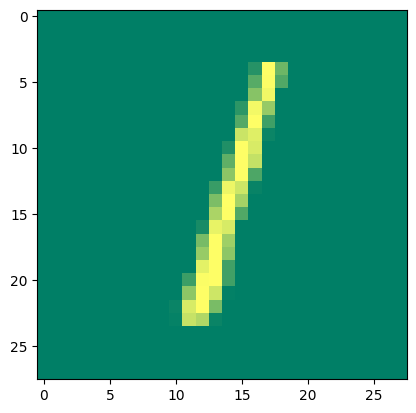

the value is  1
The predicted value is  1  with probability:  1.0


In [22]:
show_image_vpp(test_images[2],test_labels[2],pred[2],prob[2])